## Few-shot物体検出
TOSHIBA インターシップ：

URL:https://www.global.toshiba/jp/technology/corporate/ai/catalog062.html

たった1枚の画像を登録するだけで手間なく即座に、新しい物体を世界最高精度で検出する画像認識AIです。

### 応用先
- 工場：　製品・部品の位置確認
- プラント：　設備検出・追跡
- 物流：　商品検出・追跡


## アイデアシンキング


The original task is object detection, which may use the YOLO fine-tuned model. 

However, for precise industrial components, detection needs to reach the **semantic level.**

To enhance the task to the semantic level with pixel-level accuracy, I plan to use **semantic segmentation.**

**How to enhance the performence and applied into the industry?**

Using SAM2 and LLM to build a VLM pipline of the industry ai 

- An **end-to-end** model can be applied to industrial environments and supports edge devices.
- SAM2 is a model for **zero-shot** semantic segmentation of images or videos in real time.

### SAM2->Zero-Shot segmentation->Mask Generate
prompt:

- Text prompt　-> LLM enhance the performance
- Point
- Box
- Mixed prompt -> Multimodal LLM

### VLM(vision language model)

- input the Mask -> Generate the solution
eg.


### 実験と評価

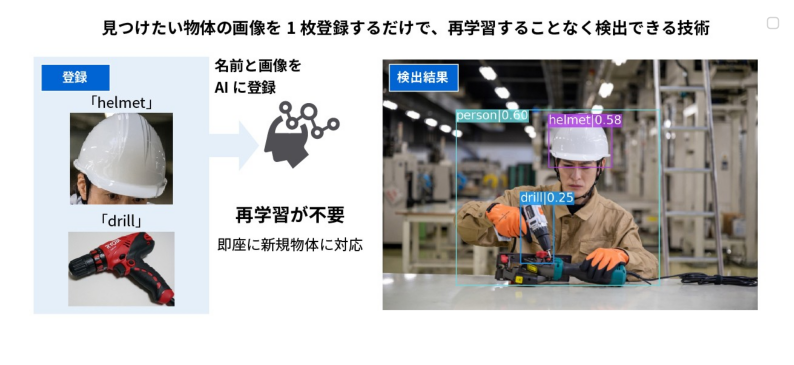

Prediction completed successfully.


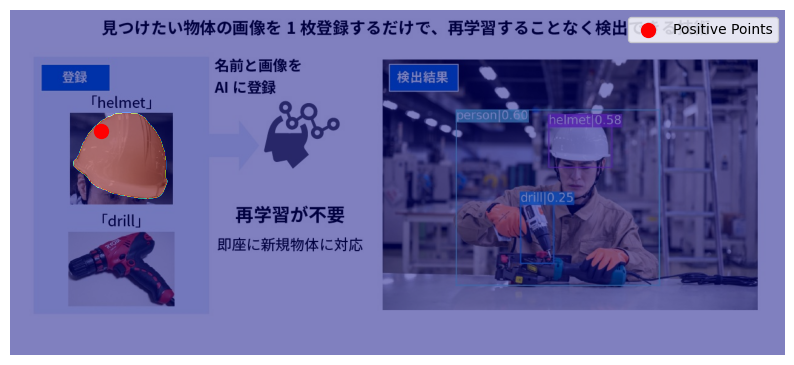

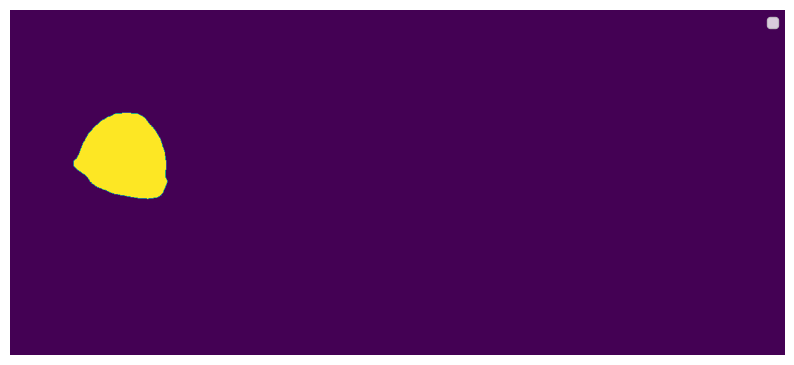

In [7]:
import torch
from PIL import Image
from sam2_oringinal.sam2.sam2_image_predictor import SAM2ImagePredictor
import matplotlib.pyplot as plt
import numpy as np

# Open the image and convert it to RGB
image_path = "/ndata/yzh/SAM2-for-XR/images/TOSHIBA.png"
image = Image.open(image_path).convert("RGB")
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.legend()
plt.show()
# Load the model
predictor = SAM2ImagePredictor.from_pretrained("facebook/sam2-hiera-large")

# Example prompts
# point_coords = [[100, 200], [150, 250]]  # Provide coordinate points (x, y)
# point_labels = [1, 0]  # Labels corresponding to the coordinate points

# point_coords = [[150, 200],[150,400]]  # Provide coordinate points (x, y)
# point_labels = [1,1]  # Labels corresponding to the coordinate points
# input_prompts = {
#     "point_coords": point_coords,
#     "point_labels": point_labels
# }
point_coords = [[150, 200]]  # Provide coordinate points (x, y)
point_labels = [1]  # Labels corresponding to the coordinate points
input_prompts = {
    "point_coords": point_coords,
    "point_labels": point_labels
}
# Set the image and make predictions
with torch.inference_mode(), torch.autocast("cuda", dtype=torch.bfloat16):
    predictor.set_image(image)
    masks, _, _ = predictor.predict(
        point_coords=input_prompts["point_coords"],
        point_labels=input_prompts["point_labels"]
    )

print("Prediction completed successfully.")

mask = masks[0]

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.imshow(mask, alpha=0.5, cmap='jet')


# Extract coordinate points
point_coords = np.array(point_coords)  # shape: (N, 2)
x_coords = point_coords[:, 0]
y_coords = point_coords[:, 1]

# Differentiate points based on labels
# Assume label=1 represents positive points (indicated by red circles)
#       label=0 represents negative points (indicated by blue crosses)
pos_points = point_coords[np.array(point_labels) == 1]
neg_points = point_coords[np.array(point_labels) == 0]

if len(pos_points) > 0:
    plt.scatter(pos_points[:, 0], pos_points[:, 1], c='red', marker='o', s=100, label='Positive Points')
if len(neg_points) > 0:
    plt.scatter(neg_points[:, 0], neg_points[:, 1], c='blue', marker='x', s=100, label='Negative Points')

plt.axis('off')
plt.legend()
plt.show()


plt.figure(figsize=(10, 10))

plt.imshow(image)
plt.imshow(mask)

plt.axis('off')
plt.legend()
plt.show()

Prediction completed successfully.


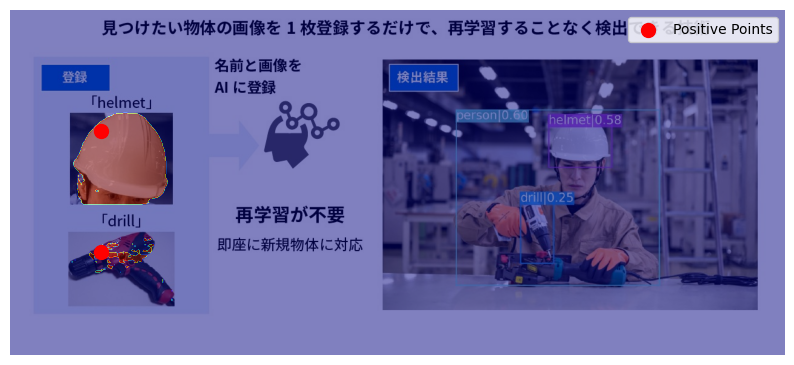

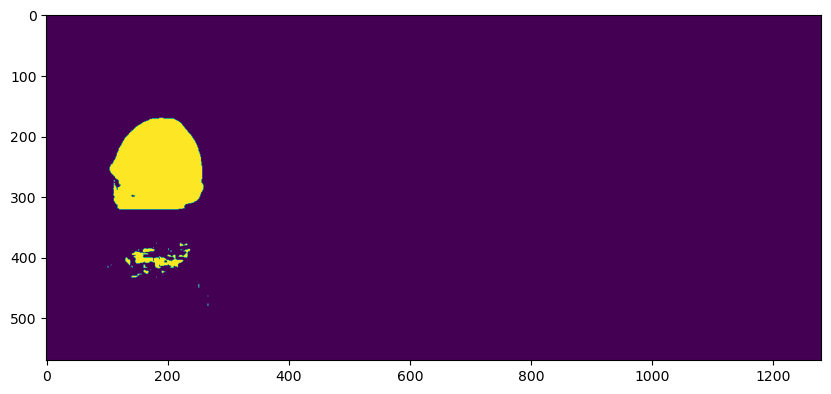

In [ ]:
point_coords = [[150, 200],[150,400]]  # 提供坐标点 (x, y)
point_labels = [1,1]  # 与坐标点对应的标签
input_prompts = {
    "point_coords": point_coords,
    "point_labels": point_labels
}
# 设置图像并预测
with torch.inference_mode(), torch.autocast("cuda", dtype=torch.bfloat16):
    predictor.set_image(image)
    masks, _, _ = predictor.predict(
        point_coords=input_prompts["point_coords"],
        point_labels=input_prompts["point_labels"]
    )

print("Prediction completed successfully.")

mask = masks[0]

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.imshow(mask, alpha=0.5, cmap='jet')


# 提取坐标点
point_coords = np.array(point_coords)  # shape: (N, 2)
x_coords = point_coords[:, 0]
y_coords = point_coords[:, 1]

# Differentiate points based on labels
# Assume label=1 represents positive points (indicated by red circles)
#       label=0 represents negative points (indicated by blue crosses)
pos_points = point_coords[np.array(point_labels) == 1]
neg_points = point_coords[np.array(point_labels) == 0]

if len(pos_points) > 0:
    plt.scatter(pos_points[:, 0], pos_points[:, 1], c='red', marker='o', s=100, label='Positive Points')
if len(neg_points) > 0:
    plt.scatter(neg_points[:, 0], neg_points[:, 1], c='blue', marker='x', s=100, label='Negative Points')

plt.axis('off')
plt.legend()
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.imshow(mask)
plt.axis('off')
plt.legend()
plt.show()

Prediction completed successfully.


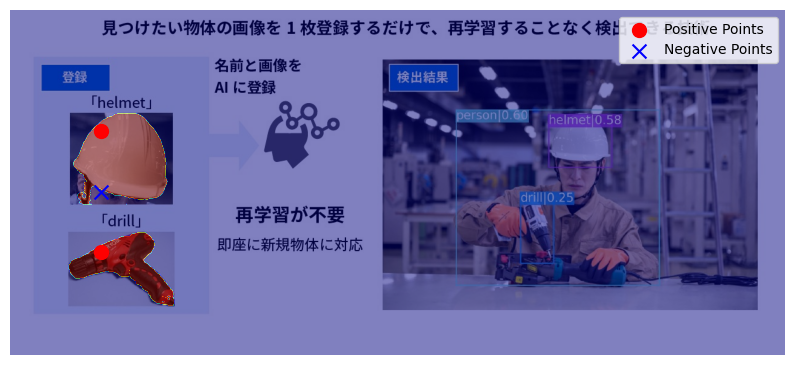

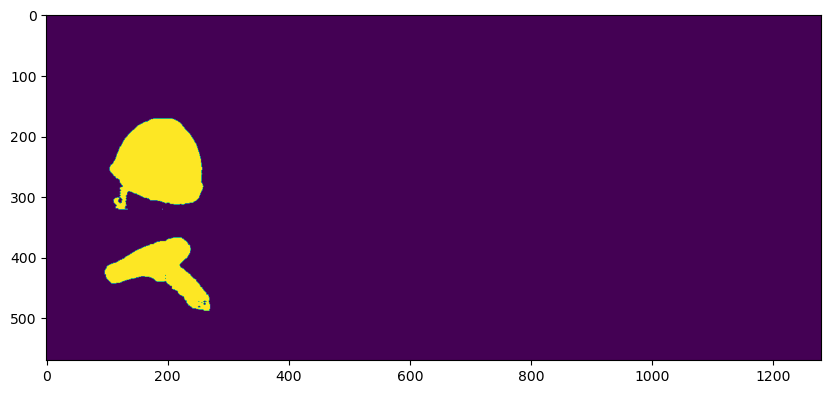

In [ ]:

point_coords = [[150, 200],[150,400],[150,300]]  # 提供坐标点 (x, y)
point_labels = [1,1,0]  # 与坐标点对应的标签
input_prompts = {
    "point_coords": point_coords,
    "point_labels": point_labels
}
# 设置图像并预测
with torch.inference_mode(), torch.autocast("cuda", dtype=torch.bfloat16):
    predictor.set_image(image)
    masks, _, _ = predictor.predict(
        point_coords=input_prompts["point_coords"],
        point_labels=input_prompts["point_labels"]
    )

print("Prediction completed successfully.")

mask = masks[0]

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.imshow(mask, alpha=0.5, cmap='jet')


# 提取坐标点
point_coords = np.array(point_coords)  # shape: (N, 2)
x_coords = point_coords[:, 0]
y_coords = point_coords[:, 1]

# Differentiate points based on labels
# Assume label=1 represents positive points (indicated by red circles)
#       label=0 represents negative points (indicated by blue crosses)
pos_points = point_coords[np.array(point_labels) == 1]
neg_points = point_coords[np.array(point_labels) == 0]

if len(pos_points) > 0:
    plt.scatter(pos_points[:, 0], pos_points[:, 1], c='red', marker='o', s=100, label='Positive Points')
if len(neg_points) > 0:
    plt.scatter(neg_points[:, 0], neg_points[:, 1], c='blue', marker='x', s=100, label='Negative Points')

plt.axis('off')
plt.legend()
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.imshow(mask)
plt.axis('off')
plt.legend()
plt.show()

### Problem (Research Questions)

- When we use multiple points as Prompt, we run into problems being incorrectly semantic segmentation.

- The semantic segmentation of drill is not very accurate, mainly due to overfitting.

- How to use LLM to enhance the performance？

I need a real-world dataset for fine-tuning the model and training, as well as applying it in actual industrial scenarios. 
Therefore, if I have the opportunity to participate in an internship, I will continue to advance this work and bring it to completion.

### Some Fine-Tuning methonds design:

- **Knowledge distillation** 
  
    Use a larger, more powerful pretrained model (e.g., an extended version of SAM2 or another semantic segmentation model) as the teacher model to transfer its knowledge to SAM2 (the student model).

    Application Scenario:

    Optimizing performance on resource-constrained devices.
    Retaining the teacher model's key features while reducing model complexity.


- **Transfer Learning**

    Freeze the initial layers of SAM2 and fine-tune only the later layers to adapt to the specific data distribution of the target domain.

    Application Scenario:
    When the target dataset shares some similarity with the pretrained dataset but needs adaptation to new scenarios.


- **Domain Adaptation**

    Apply domain adaptation techniques to minimize distribution differences between domains (e.g., training data and industrial scene data).

    Example Methods:

    Adversarial training or feature alignment.


- **Self-supervised Learning**

    Design self-supervised tasks for unlabeled data, such as contrastive learning or generative learning, to enhance the model's understanding of the target domain.

    Application Scenario:

    Improving performance when labeled data is scarce.